IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


IMPORTING DATASET

In [2]:
labDF = pd.read_excel('Authorized_Lab_Data.xlsx')
labDF.head()

,NO,YETKİLENDİRME GRUP NO,İL,KURUM
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI


In [3]:
labDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NO                     523 non-null    int64 
 1   YETKİLENDİRME GRUP NO  523 non-null    int64 
 2   İL                     523 non-null    object
 3   KURUM                  523 non-null    object
dtypes: int64(2), object(2)
memory usage: 16.5+ KB


TRANSLATING LABEL NAMES TO ENGLISH

In [4]:
labDF['AUTHORIZATION GROUP NO'] = labDF['YETKİLENDİRME GRUP NO']
labDF['PROVINCE'] = labDF['İL']
labDF['INSTITUTION'] = labDF['KURUM']

In [5]:
labDF.head()

,NO,YETKİLENDİRME GRUP NO,İL,KURUM,AUTHORIZATION GROUP NO,PROVINCE,INSTITUTION
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI


DROPPING TURKISH NAMED COLUMNS

In [6]:
labDF.drop(labels = 'YETKİLENDİRME GRUP NO', axis= 1, inplace= True)
labDF.drop(labels = 'İL', axis= 1, inplace= True)
labDF.drop(labels = 'KURUM', axis= 1, inplace= True)

In [7]:
labDF.head()

,NO,AUTHORIZATION GROUP NO,PROVINCE,INSTITUTION
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI


FINDING NUMBER OF LABS IN EACH CITY

In [8]:
def findCount(data):
    grouped_data = data.groupby('PROVINCE')['AUTHORIZATION GROUP NO'].sum().reset_index()
    return grouped_data


result = findCount(labDF)
print(result)

           PROVINCE  AUTHORIZATION GROUP NO
0             ADANA                      37
1     ADANA-YÜREĞİR                       9
2          ADIYAMAN                       8
3    AFYONKARAHİSAR                      13
4           AKSARAY                      12
..              ...                     ...
116    İZMİR-ALİAĞA                       6
117   İZMİR-MENEMEN                       5
118   İZMİR-TORBALI                      13
119       ŞANLIURFA                      21
120          ŞIRNAK                       5

[121 rows x 2 columns]


In [9]:
labDF.head()

,NO,AUTHORIZATION GROUP NO,PROVINCE,INSTITUTION
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI


In [10]:
labDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NO                      523 non-null    int64 
 1   AUTHORIZATION GROUP NO  523 non-null    int64 
 2   PROVINCE                523 non-null    object
 3   INSTITUTION             523 non-null    object
dtypes: int64(2), object(2)
memory usage: 16.5+ KB


FINDING NUMBER OF LABS IN EACH REGION

In [11]:
marmara = ["İSTANBUL", "BURSA", "BALIKESİR", "BİLECİK" , "EDİRNE","KIRKLARELİ", "TEKİRDAĞ","KOCAELİ","YALOVA", "SAKARYA", "ÇANAKKALE",  "İZMİT"]
ege = ["İZMİR", "MANİSA", "AYDIN", "DENİZLİ", "MUĞLA", "AFYONKARAHİSAR", "KÜTAHYA", "UŞAK"]
akdeniz = ["ADANA", "ANTALYA", "BURDUR", "HATAY", "ISPARTA", "MERSİN", "OSMANİYE"]
karadeniz = ["AMASYA", "ARTVİN", "BARTIN", "BAYBURT", "BOLU", "ÇORUM", "DÜZCE", "GÜMÜŞHANE", "GİRESUN", "KARABÜK", "KASTAMONU", "ORDU", "RİZE", "SAMSUN", "SİNOP", "TOKAT", "TRABZON", "ZONGULDAK"]
ic = ["AKSARAY", "ANKARA", "ÇANKIRI", "ESKİŞEHİR", "KARAMAN", "KAYSERİ", "KIRIKKALE", "KONYA", "NEVŞEHİR", "NİĞDE", "SİVAS", "YOZGAT"]
dogu = ["AĞRI", "ARDAHAN", "BİTLİS", "BİNGÖL", "ELAZIĞ", "ERZİNCAN", "ERZURUM", "HAKKARİ", "IĞDIR", "KARS", "MALATYA", "MUŞ", "TUNCELİ", "VAN"]
guneydogu = ["GAZİANTEP", "DİYARBAKIR", "ŞANLIURFA", "BATMAN", "ADIYAMAN", "SİİRT", "MARDİN", "KİLİS", "ŞIRNAK"]



In [12]:
def findProvince(city, marmara, akdeniz, karadeniz, ic, dogu, guneydogu):
    for i in marmara:
        if (i in city):
            return "MARMARA"
    for i in ege:
        if (i in city):
            return "EGE"
    for i in akdeniz:
        if (i in city):
            return "AKDENİZ"
    for i in karadeniz:
        if (i in city):
            return "KARADENİZ"
    for i in ic:
        if (i in city):
            return "İÇ ANADOLU"
    for i in dogu:
        if (i in city):
            return "DOĞU ANADOLU"
    for i in guneydogu:
        if (i in city):
            return "GÜNEYDOĞU ANADOLU"

In [13]:
labDF["REGION"] = labDF["PROVINCE"].apply(lambda x: findProvince(x,marmara, akdeniz, karadeniz, ic, dogu, guneydogu))

In [14]:
labDF.head(20)

,NO,AUTHORIZATION GROUP NO,PROVINCE,INSTITUTION,REGION
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...,AKDENİZ
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ,AKDENİZ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ,AKDENİZ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ,AKDENİZ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI,AKDENİZ
5,6,9,ADANA,ÖZEL BİR-LAB LABORATUVARI,AKDENİZ
6,7,9,ADANA,ÖZEL ADANA METRO HASTANESİ,AKDENİZ
7,8,9,ADANA-YÜREĞİR,YÜREĞİR DEVLET HASTANESİ,AKDENİZ
8,9,2,ADIYAMAN,ADIYAMAN EĞİTİM VE ARAŞTIRMA HASTANESİ MİKROBİ...,GÜNEYDOĞU ANADOLU
9,10,6,ADIYAMAN,ÖZEL ADIYAMAN PARK HOSPİTAL,GÜNEYDOĞU ANADOLU


PLOTTING THE GRAPHS

REGION GRAPH

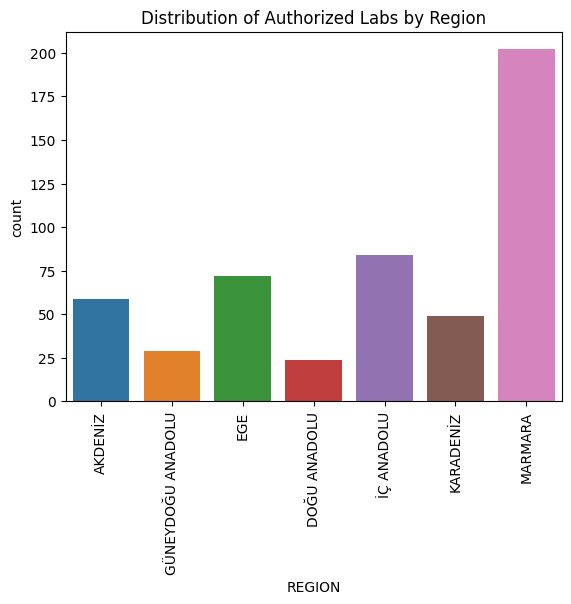

In [15]:
sns.countplot(x= labDF["REGION"])
plt.xticks(rotation = 90)
plt.title("Distribution of Authorized Labs by Region")
plt.savefig("Dist_of_labs_region.png")
plt.show()


PROVINCE GRAPH

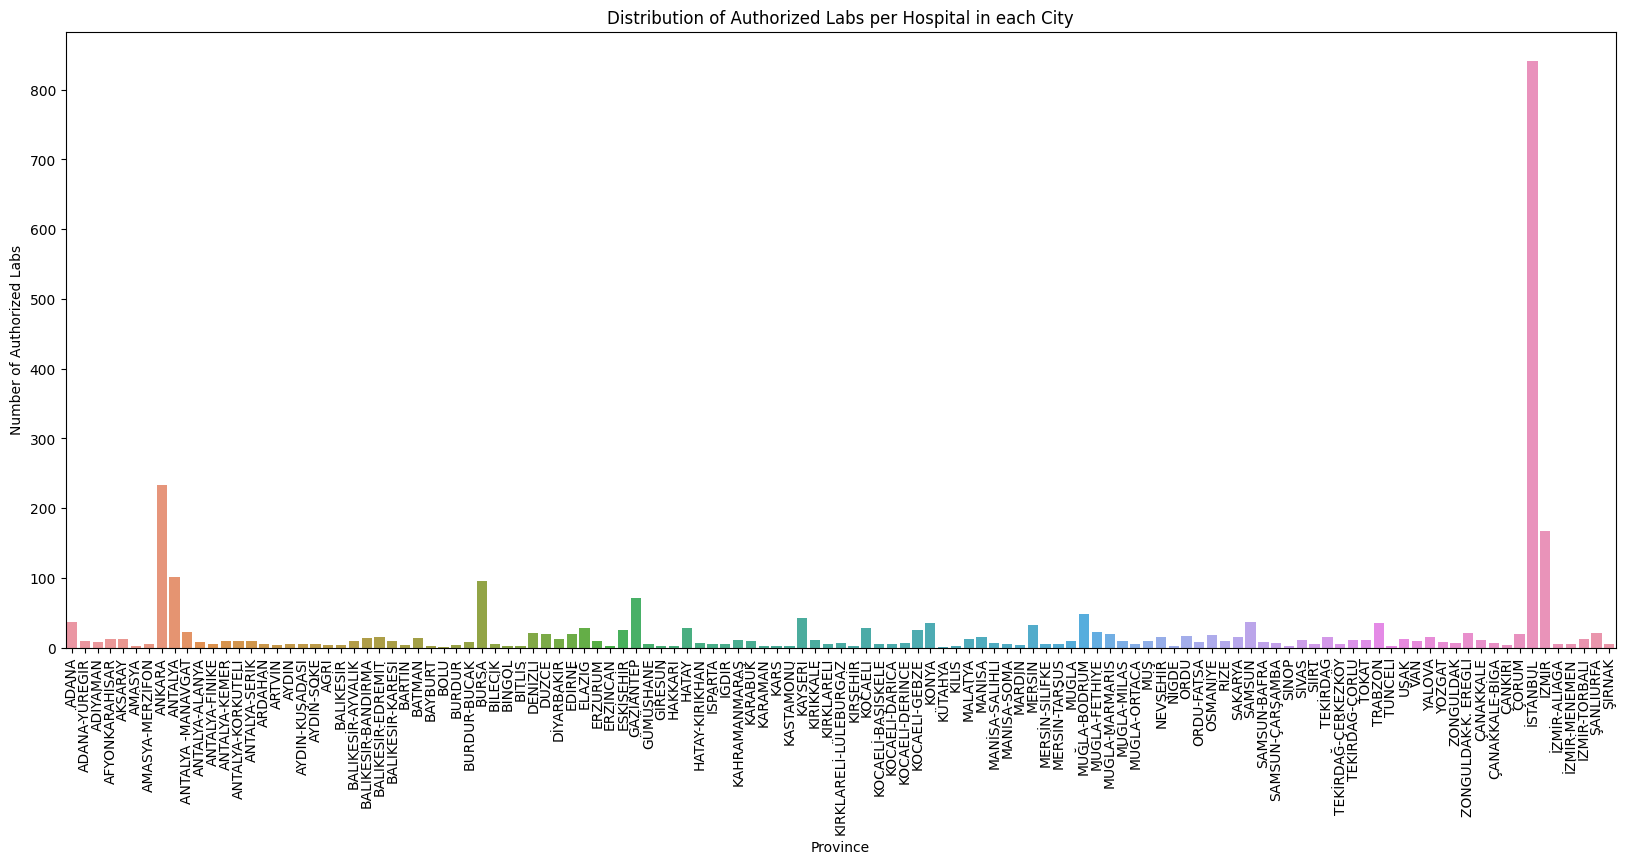

In [16]:
province_names = result['PROVINCE'].values

lab_counts = result['AUTHORIZATION GROUP NO'].values

plt.figure(figsize=(20,8))

sns.barplot(x=province_names, y=lab_counts)

plt.title('Distribution of Authorized Labs per Hospital in each City')

plt.xlabel('Province')

plt.ylabel('Number of Authorized Labs')

plt.xticks(rotation=90)
plt.savefig("Dist_of_labs_province.png")

plt.show()